Case Studies

Project: 1

Group: 3

Group Members:
 - Muhammad Raafey Tariq (231806)
 - Farrukh Ahmed (230614)
 - Amirreza Khamehchin Khiabani (230891)
 - Aymane Hachcham (236392)

## Linear Model fitting for the Systolic blood pressure data

In [133]:
import pandas as pd

file_path = "../styrian_health_data.xlsx"
sheet_name = "Sheet 1"
data_df = pd.read_excel(file_path, sheet_name=sheet_name)
data_df.describe()

/Users/aymanehachcham/miniconda3/envs/case_s1/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,id,zeit,terminal,postleitzahl,befinden,geburtsjahr,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia
count,16386.000000,16386,16386.000000,16052.000000,16363.000000,16363.000000,16341.000000,16330.000000,16386.000000,16386.000000
mean,23172.171549,2006-08-03 19:02:11.527462400,1.921885,7939.793608,1.818493,1963.866100,122.406707,79.860808,124.095325,82.037227
min,11519.000000,2006-04-27 10:49:12,1.000000,1010.000000,1.000000,1880.000000,34.000000,30.000000,43.000000,27.000000
25%,17978.250000,2006-06-17 12:27:35.250000,1.000000,8051.000000,1.000000,1950.000000,115.000000,75.000000,110.000000,73.000000
50%,23345.500000,2006-08-08 14:29:51.500000,2.000000,8401.000000,2.000000,1962.000000,120.000000,80.000000,123.000000,81.000000
75%,28781.750000,2006-09-16 14:22:10.249999872,3.000000,8641.000000,2.000000,1979.000000,130.000000,85.000000,137.000000,90.000000
max,34703.000000,2006-11-06 09:55:33,3.000000,9991.000000,5.000000,2006.000000,299.000000,212.000000,217.000000,197.000000
std,6556.963202,NaN,0.822702,1663.222660,0.752412,18.528596,16.941340,9.955571,19.675775,14.638693


## Data Processing

In [134]:
# fixing dtypes
data_df.postleitzahl = data_df.postleitzahl.astype('str')
data_df.geburtsjahr = data_df.geburtsjahr.astype('Int64')
# data_df.befinden = data_df.befinden.astype('Int64')
data_df.messwert_bp_sys = pd.to_numeric(data_df.messwert_bp_sys)
data_df.messwert_bp_dia = pd.to_numeric(data_df.messwert_bp_dia)
data_df.schaetzwert_bp_sys = pd.to_numeric(data_df.schaetzwert_bp_sys)
data_df.schaetzwert_by_dia = pd.to_numeric(data_df.schaetzwert_by_dia)

# adding variable for is_local
mask = data_df.gemeinde.isna() & data_df.bezirk.isna() & data_df.bundesland.isna()
data_df["is_local_resident"] = True
data_df.loc[mask, "is_local_resident"] = False

# adding variable for age
age =  data_df["zeit"].dt.year - pd.to_datetime(data_df['geburtsjahr'], format='%Y').dt.year
data_df["age"] = age.astype("Int64")

# adding variable for age group
data_df["age_group"] = pd.cut(data_df.age, bins=[0,12,19,65,130],labels=['children', 'teenager', 'adult','65 over'])
data_df["age_group"] = data_df.age_group.astype(str)

#replacing nans for variables

data_df.loc[data_df.geschlecht.isna() == True, 'raucher'] = "unknown"
data_df.loc[data_df.geschlecht.isna() == True, 'blutzucker_bekannt'] = "unknown"
data_df.loc[data_df.geschlecht.isna() == True, 'cholesterin_bekannt'] = "unknown"
data_df.loc[data_df.geschlecht.isna() == True, 'in_behandlung'] = "unknown"
data_df.loc[data_df.geschlecht.isna() == True, 'befinden'] = "unknown"
data_df.loc[data_df.age_group == "nan", 'age_group'] = "unknown"

data_df.loc[mask, 'gemeinde'] = "not applicable"
data_df.loc[mask, 'bezirk'] = "not applicable"
data_df.loc[mask, 'bundesland'] = "not applicable"
data_df.loc[mask, 'postleitzahl'] = "not applicable"
data_df.loc[data_df.postleitzahl == "nan", 'postleitzahl'] = "unknown"

# creating variables for missing values in bp

data_df["is_missing_schaetzwert_bp_sys"] = False
data_df.loc[data_df.schaetzwert_bp_sys.isna() == True, "is_missing_schaetzwert_bp_sys"] = True
data_df["is_missing_schaetzwert_by_dia"] = False
data_df.loc[data_df.schaetzwert_by_dia.isna() == True, "is_missing_schaetzwert_by_dia"] = True

# removing useless variables
data_df.drop(data_df[data_df.age > 100].index, inplace=True)
data_df.drop(data_df[data_df.age < 15].index, inplace=True)

data_df.loc[data_df.geschlecht.isna() == True, 'geschlecht'] = "unknown"

In [135]:
data_df

,id,zeit,terminal,postleitzahl,gemeinde,bezirk,bundesland,befinden,geburtsjahr,geschlecht,...,in_behandlung,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia,is_local_resident,age,age_group,is_missing_schaetzwert_bp_sys,is_missing_schaetzwert_by_dia
0,11519,2006-04-27 10:49:12,2,8054.0,Seiersberg,Graz-Umgebung,Steiermark,1.0,1967,m,...,False,142.0,89.0,179,111,True,39,adult,False,False
1,11520,2006-04-27 11:10:46,2,8403.0,Lebring-Sankt Margarethen,Leibnitz,Steiermark,1.0,1968,m,...,False,140.0,70.0,109,80,True,38,adult,False,False
2,11521,2006-04-27 11:21:09,2,8020.0,Graz - Gries,Graz(Stadt),Steiermark,1.0,1973,m,...,False,130.0,75.0,128,108,True,33,adult,False,False
3,11522,2006-04-27 11:32:59,1,8044.0,Graz - Mariatrost,Graz(Stadt),Steiermark,1.0,1961,m,...,False,100.0,80.0,130,90,True,45,adult,False,False
4,11524,2006-04-27 12:01:48,2,8010.0,Graz - Geidorf,Graz(Stadt),Steiermark,2.0,1978,f,...,False,140.0,70.0,144,103,True,28,adult,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16381,34694,2006-10-29 17:16:24,3,8616.0,Gasen,Weiz,Steiermark,2.0,1968,f,...,False,110.0,75.0,119,81,True,38,adult,False,False
16382,34696,2006-10-29 17:30:02,3,8700.0,Leoben,Leoben,Steiermark,2.0,1967,f,...,False,120.0,75.0,137,92,True,39,adult,False,False
16383,34698,2006-11-02 10:23:42,1,8020.0,Graz - Lend,Graz(Stadt),Steiermark,4.0,1980,f,...,False,130.0,80.0,161,123,True,26,adult,False,False
16384,34702,2006-11-06 09:26:32,2,8010.0,Graz - Sankt Leonhard,Graz(Stadt),Steiermark,2.0,1979,m,...,False,125.0,90.0,150,77,True,27,adult,False,False


In [136]:
# drop null values
data_df.dropna(inplace=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14831 entries, 0 to 16384
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             14831 non-null  int64         
 1   zeit                           14831 non-null  datetime64[ns]
 2   terminal                       14831 non-null  int64         
 3   postleitzahl                   14831 non-null  object        
 4   gemeinde                       14831 non-null  object        
 5   bezirk                         14831 non-null  object        
 6   bundesland                     14831 non-null  object        
 7   befinden                       14831 non-null  object        
 8   geburtsjahr                    14831 non-null  Int64         
 9   geschlecht                     14831 non-null  object        
 10  raucher                        14831 non-null  object        
 11  blutzucker_bekannt  

In [137]:
# Convert pd.int64 to int, important for the model
# data_df = data_df.astype(int)
data_df.age = data_df.age.astype(int)

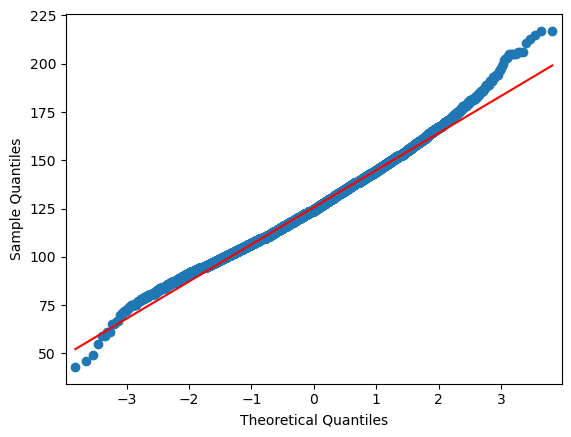

In [138]:
# check assumptions of residuals for linear model

import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# check if the resiuals are normally distributed and have constant variance
sm.qqplot(data_df.messwert_bp_sys, line='s')
plt.show()



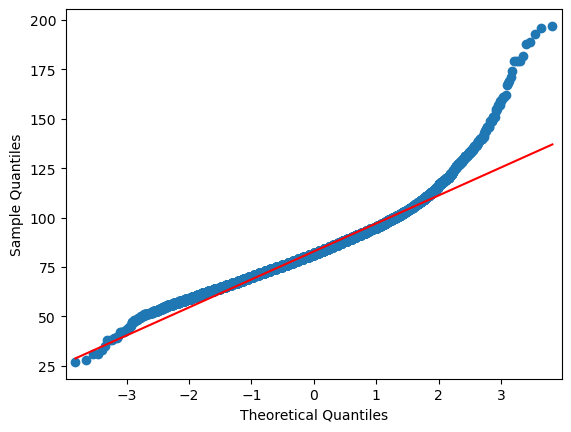

In [139]:
sm.qqplot(data_df.messwert_bp_dia, line='s')
plt.show()

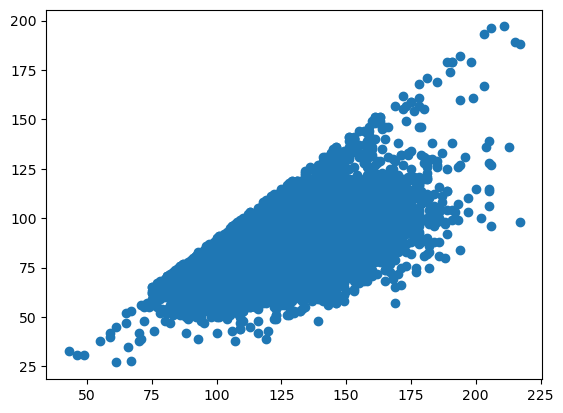

In [140]:
# check if the residuals are independent
plt.scatter(data_df.messwert_bp_sys, data_df.messwert_bp_dia)

In [141]:
data_df.columns

Index(['id', 'zeit', 'terminal', 'postleitzahl', 'gemeinde', 'bezirk',
       'bundesland', 'befinden', 'geburtsjahr', 'geschlecht', 'raucher',
       'blutzucker_bekannt', 'cholesterin_bekannt', 'in_behandlung',
       'schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_sys',
       'messwert_bp_dia', 'is_local_resident', 'age', 'age_group',
       'is_missing_schaetzwert_bp_sys', 'is_missing_schaetzwert_by_dia'],
      dtype='object')

<Axes: xlabel='messwert_bp_sys'>

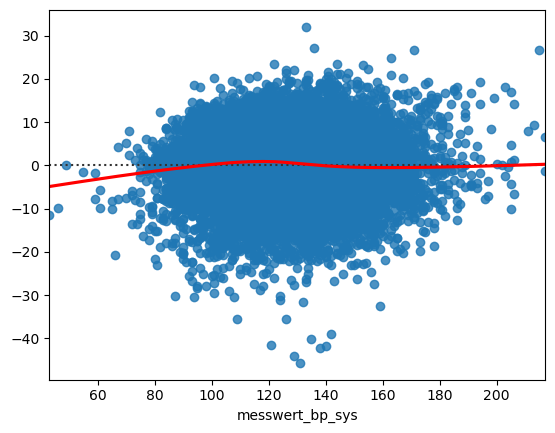

In [142]:
# Check if the residuals are homoscedastic
# first fit a linear model to the data having messwert_bp_sys as the dependent variable
# and all other variables as the independent variables
# then plot the residuals against the predicted values

model = smf.ols('messwert_bp_sys ~ terminal + bundesland + befinden + geschlecht + raucher + blutzucker_bekannt + cholesterin_bekannt + in_behandlung + schaetzwert_bp_sys + is_local_resident + age + age_group + is_missing_schaetzwert_bp_sys', data=data_df).fit()

predicted_values = model.fittedvalues
residuals = model.resid

sns.residplot(data=data_df, x=data_df.messwert_bp_sys, y=residuals, lowess=True, line_kws=dict(color="r"))

<Axes: xlabel='messwert_bp_dia'>

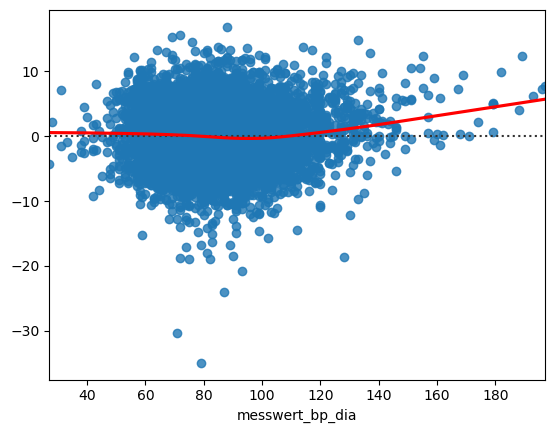

In [143]:
model_dia = smf.ols('messwert_bp_dia ~ terminal + bundesland + befinden + geschlecht + raucher + blutzucker_bekannt + cholesterin_bekannt + in_behandlung + schaetzwert_by_dia  + is_local_resident + age + age_group + is_missing_schaetzwert_by_dia', data=data_df).fit()

predicted_values_dia = model_dia.fittedvalues
residuals_dia = model_dia.resid

sns.residplot(data=data_df, x=data_df.messwert_bp_dia, y=residuals_dia, lowess=True, line_kws=dict(color="r"))

## Final Model Summaries

In [144]:
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        messwert_bp_sys   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     153.1
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:06:16   Log-Likelihood:                -63315.
No. Observations:               14831   AIC:                         1.267e+05
Df Residuals:                   14807   BIC:                         1.269e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [145]:
print(model_dia.summary())

                            OLS Regression Results                            
Dep. Variable:        messwert_bp_dia   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     53.38
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          5.31e-235
Time:                        22:06:19   Log-Likelihood:                -59781.
No. Observations:               14831   AIC:                         1.196e+05
Df Residuals:                   14807   BIC:                         1.198e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------